# Importing Dependencies

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



# Reading the Data

In [254]:
df = pd.read_csv("dataFiles/HINDUNILVR_cleaned.csv")

# Basic Data Cleaning

In [289]:
df = df[['Date','Open','Close']]
df['Date'] = pd.to_datetime(df['Date'], utc = True)
df.info()
df['IntradayReturn'] = np.log(df['Close'] / df['Open'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    7384 non-null   datetime64[ns, UTC]
 1   Open    7384 non-null   float64            
 2   Close   7384 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 173.2 KB


/var/folders/ph/gfqyzfbj62dch1y_68dvrhbh0000gn/T/ipykernel_71686/2624811014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], utc = True)
/var/folders/ph/gfqyzfbj62dch1y_68dvrhbh0000gn/T/ipykernel_71686/2624811014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IntradayReturn'] = np.log(df['Close'] / df['Open'])


In [290]:
# df = df.set_index('Date')
print(df.head())

# df.dropna(inplace=True)
# df.shape

                       Date       Open      Close  IntradayReturn
0 1995-12-31 18:30:00+00:00  34.845124  34.623840       -0.006371
1 1996-01-01 18:30:00+00:00  34.623829  34.993568        0.010622
2 1996-01-02 18:30:00+00:00  34.993582  34.786304       -0.005941
3 1996-01-03 18:30:00+00:00  34.733077  34.789097        0.001612
4 1996-01-04 18:30:00+00:00  34.789098  34.733078       -0.001612


# Calculating Return

In [291]:
df['LogClose'] = np.log(df['Close']) 

df['Return'] =  df['Close'] - df['Open'] 
# df['LogReturn'] = np.log(df['Return']) 

df.head()
df2 = df

In [292]:
# df2 = df2.set_index('Date')
# df3 = df2.resample('ME').last()
df3 = df2

In [293]:
df3.head()

,Date,Open,Close,IntradayReturn,LogClose,Return
0,1995-12-31 18:30:00+00:00,34.845124,34.623840,-0.006371,3.544542,-0.221284
1,1996-01-01 18:30:00+00:00,34.623829,34.993568,0.010622,3.555164,0.369739
2,1996-01-02 18:30:00+00:00,34.993582,34.786304,-0.005941,3.549224,-0.207277
3,1996-01-03 18:30:00+00:00,34.733077,34.789097,0.001612,3.549304,0.056020
4,1996-01-04 18:30:00+00:00,34.789098,34.733078,-0.001612,3.547692,-0.056020


# Plot of Closing value over time


<Axes: xlabel='Date', ylabel='Return'>

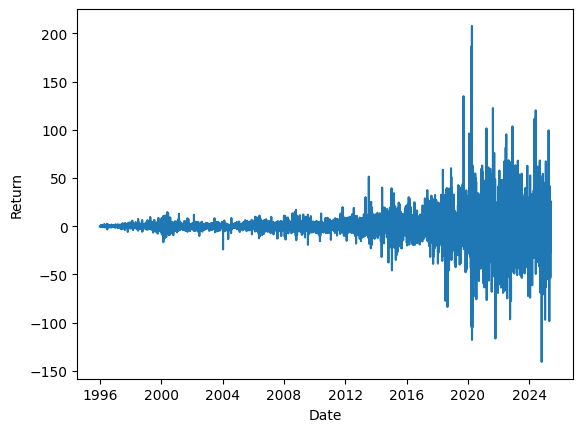

In [294]:
sns.lineplot(data = df3, x = "Date", y = "Return")

<Axes: xlabel='Date', ylabel='IntradayReturn'>

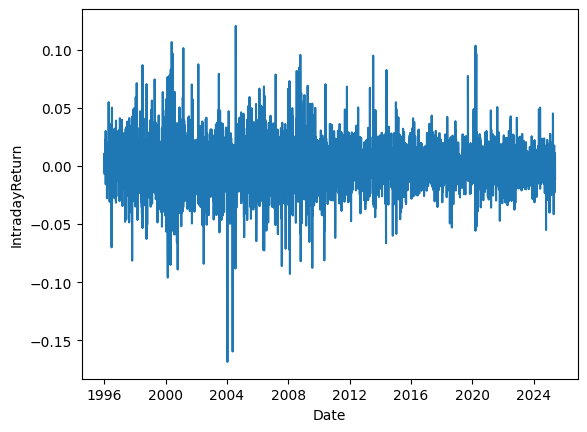

In [300]:
sns.lineplot(data=df3, x="Date", y="IntradayReturn")

<Axes: xlabel='Date', ylabel='Close'>

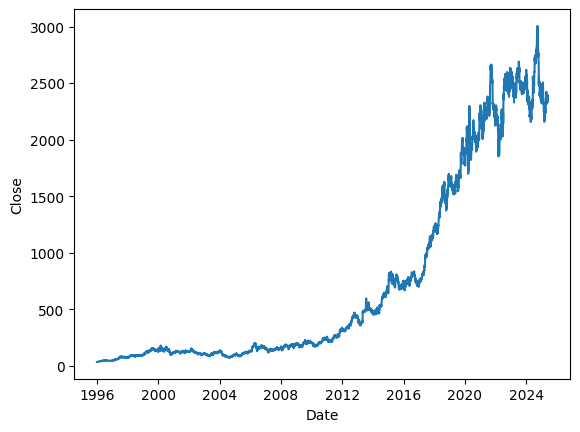

In [296]:
sns.lineplot(data=df3, x="Date", y="Close")

<Axes: xlabel='Date', ylabel='LogClose'>

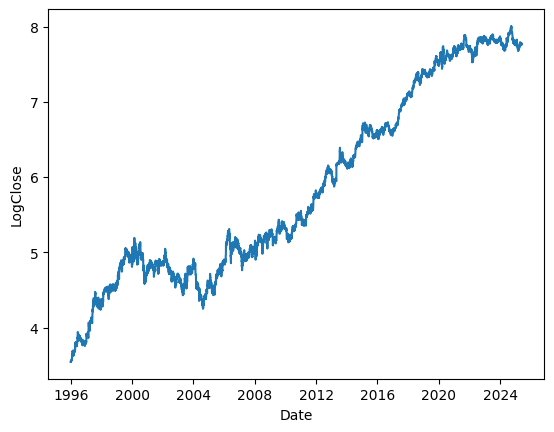

In [297]:
sns.lineplot(data=df3, x="Date", y="LogClose")

# ACF and PACF

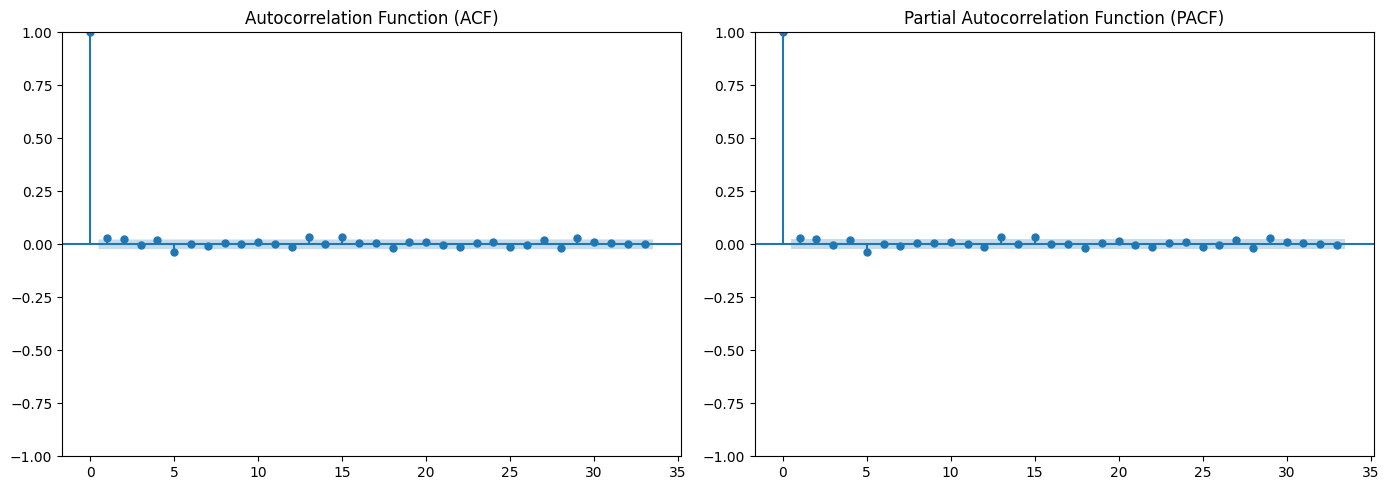

In [303]:
from statsmodels.graphics.tsaplots import plot_pacf
series = df3['IntradayReturn'].dropna()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(series, lags=33, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(series, lags=33, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Decomposition

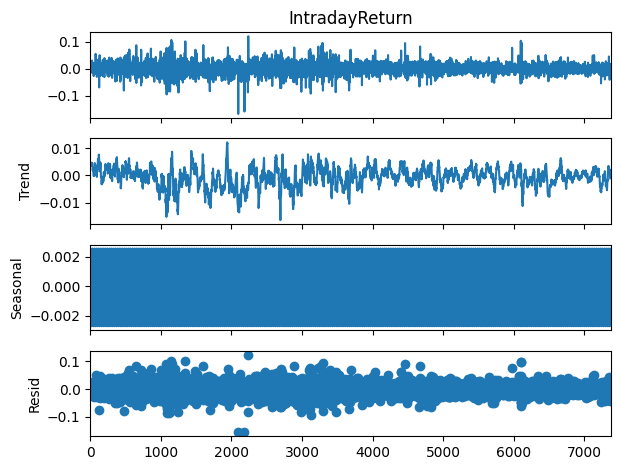

In [310]:
decomposition = seasonal_decompose(df3["IntradayReturn"], model="additive", period=30)
decomposition.plot()
plt.show()

# Augmented Dickey Fuller

In [311]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 0.42298147350218557
p-value: 0.9823343184504995
Used lags: 33
Number of observations: 7350
Critical Values:
   1%: -3.431240011602706
   5%: -2.861933316570829
   10%: -2.566979358119302


In [312]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['IntradayReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -20.757933839421188
p-value: 0.0
Used lags: 14
Number of observations: 7369
Critical Values:
   1%: -3.4312377160244014
   5%: -2.861932302253562
   10%: -2.566978818183129


In [313]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Return'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -14.581925017289008
p-value: 4.454265118798569e-27
Used lags: 36
Number of observations: 7347
Critical Values:
   1%: -3.4312403751481746
   5%: -2.861933477205856
   10%: -2.566979443627729
